In [50]:
#importing libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import gaussian_kde
import urllib.request

In [51]:
#Downloading the dataset from GitHub
!curl -L -o human_behavior_dataset.csv https://raw.githubusercontent.com/amnafatimaa6-ops/data-visualization/main/human_behavior_dataset.csv
#Loading it into a DataFrame
df = pd.read_csv('human_behavior_dataset.csv')
df.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8913  100  8913    0     0  69810      0 --:--:-- --:--:-- --:--:-- 69632


,Date,Stress_Level,Sleep_Hours,Screen_Time_Hours,Caffeine_Intake_Cups,Mood_Score,Daily_Steps,Primary_Activity
0,2024-01-01,7,8.3,5.6,0,NaN,5752.0,Gaming
1,2024-01-02,4,5.9,8.4,1,1.0,10828.0,Workout
2,2024-01-03,8,5.8,6.8,1,9.0,6618.0,Gaming
3,2024-01-04,5,7.1,6.0,0,1.0,7434.0,Workout
4,2024-01-05,7,9.4,5.1,5,4.0,8740.0,Reading


In [52]:
#checking data first
df.describe
df.columns
print(df.dtypes)
print('number of duplicates',df.duplicated().sum())
print('number of null values', df.isnull().sum())
print(df['Primary_Activity'].unique())
print(df['Caffeine_Intake_Cups'].unique())


Date                     object
Stress_Level              int64
Sleep_Hours             float64
Screen_Time_Hours       float64
Caffeine_Intake_Cups      int64
Mood_Score              float64
Daily_Steps             float64
Primary_Activity         object
dtype: object
number of duplicates 10
number of null values Date                    0
Stress_Level            0
Sleep_Hours             5
Screen_Time_Hours       0
Caffeine_Intake_Cups    0
Mood_Score              5
Daily_Steps             5
Primary_Activity        0
dtype: int64
['Gaming' 'Workout' 'Reading' 'Sleeping' 'Travel' 'Studying']
[0 1 5 2 3 6 4 8]


In [53]:
#cleaning data
df = df.drop_duplicates() #dropping duplicates
print("Duplicate rows after:", df.duplicated().sum())
#filling nan
numeric_cols = ['Stress_Level',"Sleep_Hours", "Screen_Time_Hours", "Caffeine_Intake_Cups", "Mood_Score", "Daily_Steps"]
for col in numeric_cols:
  df[col].fillna(df[col].mean(), inplace = True)
categorical_cols = ["Primary_Activity"]
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
df['Primary_Activity'] = df['Primary_Activity'].str.title()

print(df.isna().sum())
print(df.duplicated().sum())
print(df['Primary_Activity'].unique())

Duplicate rows after: 0
Date                    0
Stress_Level            0
Sleep_Hours             0
Screen_Time_Hours       0
Caffeine_Intake_Cups    0
Mood_Score              0
Daily_Steps             0
Primary_Activity        0
dtype: int64
0
['Gaming' 'Workout' 'Reading' 'Sleeping' 'Travel' 'Studying']


/tmp/ipython-input-1892372614.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace = True)
/tmp/ipython-input-1892372614.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

One-Tailed Z-Test (H1: mean > 7000)
Z-value: 0.87449164795358
P-value: 0.19092528332469028
Fail to reject H₀: Average daily steps is NOT significantly greater than 7000


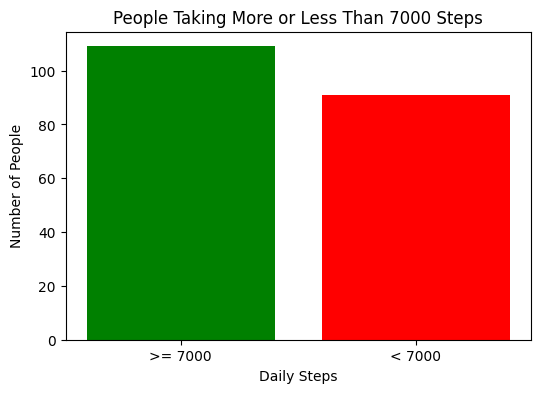

In [54]:
#HYPOTHESIS
#Z-TEST
'''
A Z-test is a statistical test used to determine if the mean of a sample is significantly different from a known population mean.
It’s used when the population standard deviation is known.
The sample size is relatively large (n > 30 is a common rule)
'''
#claim:average person takes more than 7000 steps per day
sample_col = 'Daily_Steps'
sample_mean = df[sample_col].mean()
n = df[sample_col].shape[0]
# Population stats (known or assumed)
population_mean = 7000
population_std = 2000  # assumed known
alpha = 0.05  # significance level
#One-tailed Z-test (H1: mean > 7000)
#calculate Z-statistic
z_stat = (sample_mean - population_mean) / (population_std / np.sqrt(n))
#calculate p-value
p_value = 1 - norm.cdf(z_stat)  # one-tailed: check if mean > 7000

print("One-Tailed Z-Test (H1: mean > 7000)")
print("Z-value:", z_stat)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject H₀: Average daily steps is significantly greater than 7000")
else:
    print("Fail to reject H₀: Average daily steps is NOT significantly greater than 7000")

#bar plot to check steps count above or less than 7000
#Create the step category
df['Step_Category'] = np.where(df['Daily_Steps'] >= 7000, '>= 7000', '< 7000')
#Counting how many people in each category
step_counts = df['Step_Category'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(step_counts.index, step_counts.values, color=['green','red'])
plt.title('People Taking More or Less Than 7000 Steps')
plt.xlabel('Daily Steps')
plt.ylabel('Number of People')
plt.show()

Z-value: 0.87449164795358
P-value: 0.38185056664938055
Fail to reject H₀: Stress level is NOT significantly different from 6


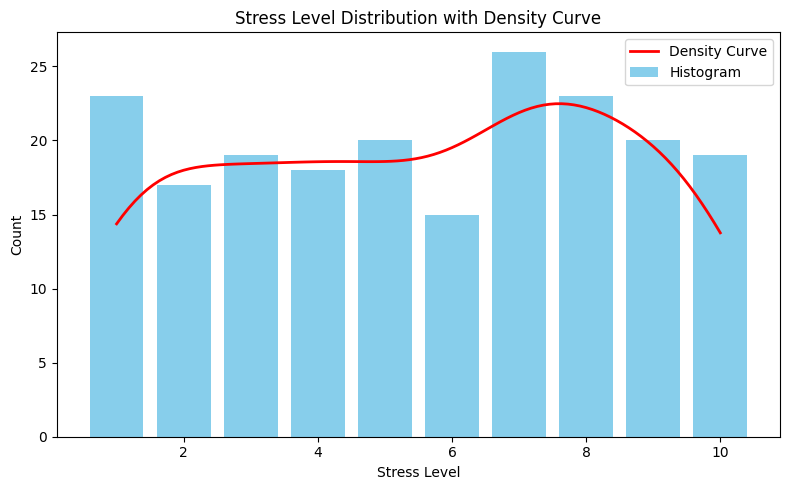

In [55]:
# Z-test
#Average stress level of humans is 6
col = 'Stress_Level'
sample_mean = df[col].mean()
sample_std = df[col].std()
n = df[col].shape[0]
#Assumed population std
population_std = 2
population_mean = 6

z_stats = (sample_mean - population_mean) / (sample_std/np.sqrt(n))
print("Z-value:", z_stat)
p_value = 2 * (1 - norm.cdf(abs(z_stat)))
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Stress level is significantly different from 6")
else:
    print("Fail to reject H₀: Stress level is NOT significantly different from 6")
#Counting how many people are at each stress level
stress_counts = df['Stress_Level'].value_counts().sort_index()
stress_values = df['Stress_Level']
#Density curve
kde = gaussian_kde(stress_values)
x_vals = np.linspace(min(stress_values), max(stress_values), 100)
y_vals = kde(x_vals)
#Plotting histogram
plt.figure(figsize=(8,5))
plt.bar(stress_counts.index, stress_counts.values, color='skyblue', label='Histogram')
plt.plot(x_vals, y_vals*len(df), color='red', linewidth=2, label='Density Curve')
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.title("Stress Level Distribution with Density Curve")
plt.legend()
plt.tight_layout()
#Save as PNG for GitHub
plt.savefig("Stress_Level_Distribution.png")
#Show plot
plt.show()



In [56]:
df.columns

Index(['Date', 'Stress_Level', 'Sleep_Hours', 'Screen_Time_Hours',
       'Caffeine_Intake_Cups', 'Mood_Score', 'Daily_Steps', 'Primary_Activity',
       'Step_Category'],
      dtype='object')

T-value: -4.561563008822338
p-value: 8.86739581318352e-06
Reject H₀: Mean sleep hours is significantly different from 7
   Sleep_Hours Sleep_Category
0          8.3     >= 7 hours
1          5.9      < 7 hours
2          5.8      < 7 hours
3          7.1     >= 7 hours
4          9.4     >= 7 hours


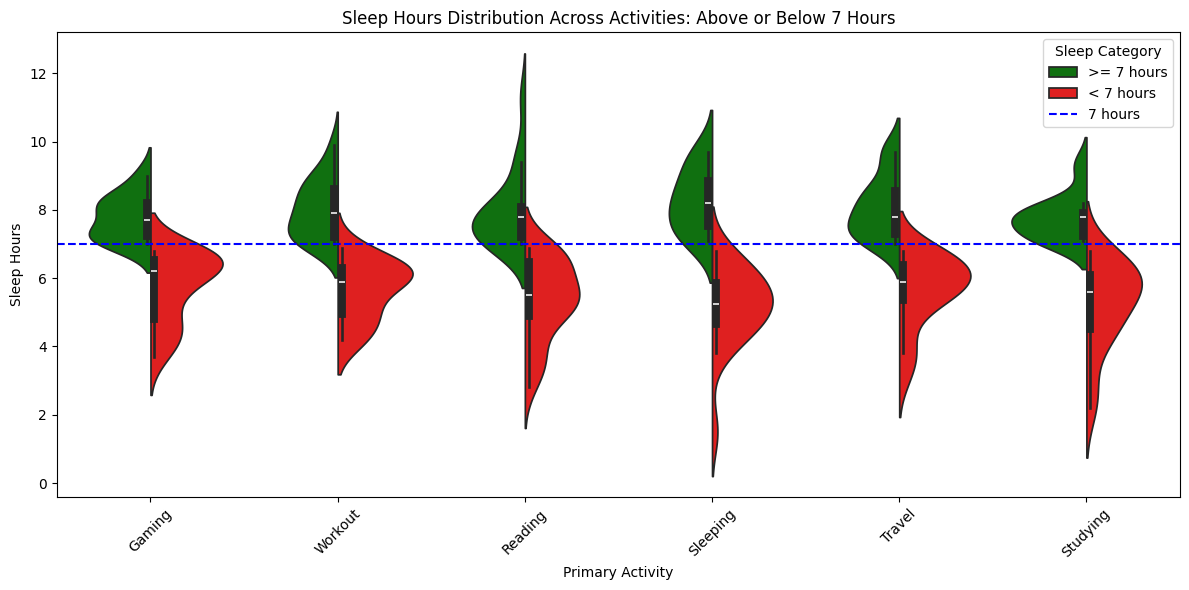

In [57]:
#T-TEST
'''
Used when population standard deviation is unknown or sample size is small (n < 30).
Tests if the sample mean is significantly different from a known value (one-sample) or if two sample means differ (two-sample).
'''
#does student sleep on average 7 hours per day?
sample_col = 'Sleep_Hours'
sam_mean = df[sample_col].mean()
sample_std = df[sample_col].std()
n = df[sample_col].shape[0]
#Population mean (hypothetical)
population_mean = 7
#Significance level
alpha = 0.05
#Calculate T-statistic
t_stat = (sam_mean - population_mean) / (sample_std / (n ** 0.5))
print("T-value:", t_stat)
#Calculate p-value (two-tailed)
p_value = 2 * (1 - t.cdf(abs(t_stat), df=n-1))
print("p-value:", p_value)
#Hypothesis decision
if p_value < alpha:
    print("Reject H₀: Mean sleep hours is significantly different from 7")
else:
    print("Fail to reject H₀: Mean sleep hours is not significantly different from 7")

df['Sleep_Category'] = np.where(df['Sleep_Hours'] >= 7, '>= 7 hours', '< 7 hours')

#Quick check
print(df[['Sleep_Hours','Sleep_Category']].head())

#Plotting violin plot
plt.figure(figsize=(12,6))

sns.violinplot(
    x='Primary_Activity',
    y='Sleep_Hours',
    hue='Sleep_Category',            #now this column exists
    data=df,
    palette={'< 7 hours':'red', '>= 7 hours':'green'},
    split=True,                      #splits the violin for each category
    inner='box'                      #show boxplot inside violin
)

#Adding horizontal line at 7 hours
plt.axhline(7, color='blue', linestyle='--', label='7 hours')

#Labels and title
plt.title("Sleep Hours Distribution Across Activities: Above or Below 7 Hours")
plt.ylabel("Sleep Hours")
plt.xlabel("Primary Activity")
plt.xticks(rotation=45)
plt.legend(title='Sleep Category', loc='upper right')

plt.tight_layout()

#Save PNG for GitHub
plt.savefig("Sleep_Hours_Distribution.png")

#Show plot
plt.show()

F-statistic: 1.5850112715024351
P-value: 0.2098557610406077
Fail to reject H₀: No significant difference in sleep hours across activities.


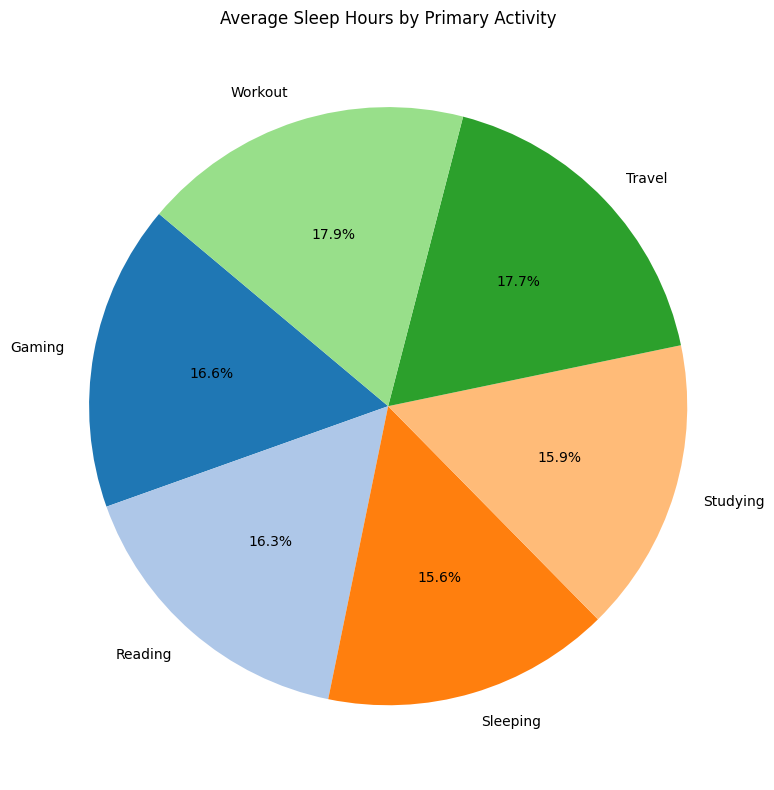

In [58]:
#ANNOVA-TEST(one way)
'''
ANOVA is a test that compares the means of three or more groups to check if they are different from each other.
'''
#does the type of primary activity affect how much people sleep?
gaming = df[df['Primary_Activity'] == 'Gaming']['Sleep_Hours']
workout = df[df['Primary_Activity'] == 'Workout']['Sleep_Hours']
reading = df[df['Primary_Activity'] == 'Reading']['Sleep_Hours']

f_stat, p_value = f_oneway(gaming, workout, reading)
print("F-statistic:", f_stat)
print("P-value:", p_value)
alpha = 0.05

if p_value < alpha:
    print("Reject H₀: At least one activity group has different mean sleep hours.")
else:
    print("Fail to reject H₀: No significant difference in sleep hours across activities.")


#Calculating average sleep per Primary Activity
sleep_avg = df.groupby('Primary_Activity')['Sleep_Hours'].mean()

#Pie chart
plt.figure(figsize=(8,8))
colors = plt.cm.tab20.colors  # nice palette for multiple categories

plt.pie(
    sleep_avg,
    labels=sleep_avg.index,
    autopct='%1.1f%%',  # show percentages
    startangle=140,
    colors=colors
)

plt.title("Average Sleep Hours by Primary Activity")
plt.tight_layout()
#Save for GitHub
plt.savefig("Average_Sleep_PieChart.png")
plt.show()
#gaming max  and min sleep hours -->  3-9
#workout max and min sleep hours -->  4-9
#reading max and min sleep hours -->  2-11
#sleeping max and min sleep hours --> 1-9.7
#travel max and min sleep hours -->   3-9
#studying max and min hours -->       2-9.3

In [59]:
df

,Date,Stress_Level,Sleep_Hours,Screen_Time_Hours,Caffeine_Intake_Cups,Mood_Score,Daily_Steps,Primary_Activity,Step_Category,Sleep_Category
0,2024-01-01,7,8.3,5.6,0,5.451282,5752.0,Gaming,< 7000,>= 7 hours
1,2024-01-02,4,5.9,8.4,1,1.000000,10828.0,Workout,>= 7000,< 7 hours
2,2024-01-03,8,5.8,6.8,1,9.000000,6618.0,Gaming,< 7000,< 7 hours
3,2024-01-04,5,7.1,6.0,0,1.000000,7434.0,Workout,>= 7000,>= 7 hours
4,2024-01-05,7,9.4,5.1,5,4.000000,8740.0,Reading,>= 7000,>= 7 hours
...,...,...,...,...,...,...,...,...,...,...
195,2024-07-14,8,1.5,5.0,5,8.000000,5488.0,Sleeping,< 7000,< 7 hours
196,2024-07-15,5,8.2,3.8,0,2.000000,8073.0,Gaming,>= 7000,>= 7 hours
197,2024-07-16,4,9.7,2.5,1,5.000000,5203.0,Sleeping,< 7000,>= 7 hours
198,2024-07-17,2,6.0,7.4,1,1.000000,7056.0,Travel,>= 7000,< 7 hours


Step_Category   < 7000  >= 7000
Sleep_Category                 
< 7 hours           57       62
>= 7 hours          34       47
Chi2 statistic: 0.46405765317183023
P-value: 0.4957337041793798
Degrees of freedom: 1
Expected frequencies:
[[54.145 64.855]
 [36.855 44.145]]
Fail to reject H₀: Sleep category and Step category are independent


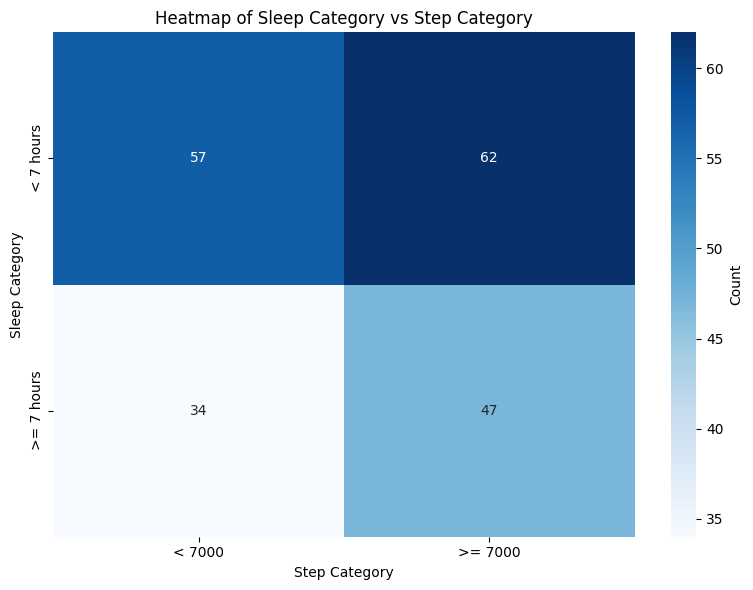

In [60]:
#CHI SQUARE TEST
'''
Chi-Square Test is a statistical test used to examine whether there is a significant association between categorical variables.
A contingency table is basically a way to organize and summarize categorical data to see how two (or more) variables relate to each other.
Chi-Square Test of Independence: Checks if two categorical variables are related or independent.
Chi-Square Goodness-of-Fit Test: Checks if the observed frequency of a single categorical variable matches an expected distribution.
'''
#claim: sleep and step are independent columns
#Creatingcontingency table
contingency_table = pd.crosstab(df['Sleep_Category'], df['Step_Category'])
print(contingency_table)

#Performing Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Hypothesis decision
alpha = 0.05
if p < alpha:
    print("Reject H₀: Sleep category and Step category are dependent")
else:
    print("Fail to reject H₀: Sleep category and Step category are independent")

#Making sure contingency_table exists
#Example: contingency_table = pd.crosstab(df['Sleep_Category'], df['Step_Category'])

plt.figure(figsize=(8,6))

#Creating Seaborn heatmap
sns.heatmap(
    contingency_table,
    annot=True,            # shows counts
    fmt='d',               # integer format
    cmap='Blues',          # color scale
    cbar_kws={'label': 'Count'}
)

plt.title("Heatmap of Sleep Category vs Step Category")
plt.xlabel("Step Category")
plt.ylabel("Sleep Category")
plt.tight_layout()

# Step 3: Save as PNG for GitHub
plt.savefig("Sleep_vs_Step_Heatmap.png")

plt.show()

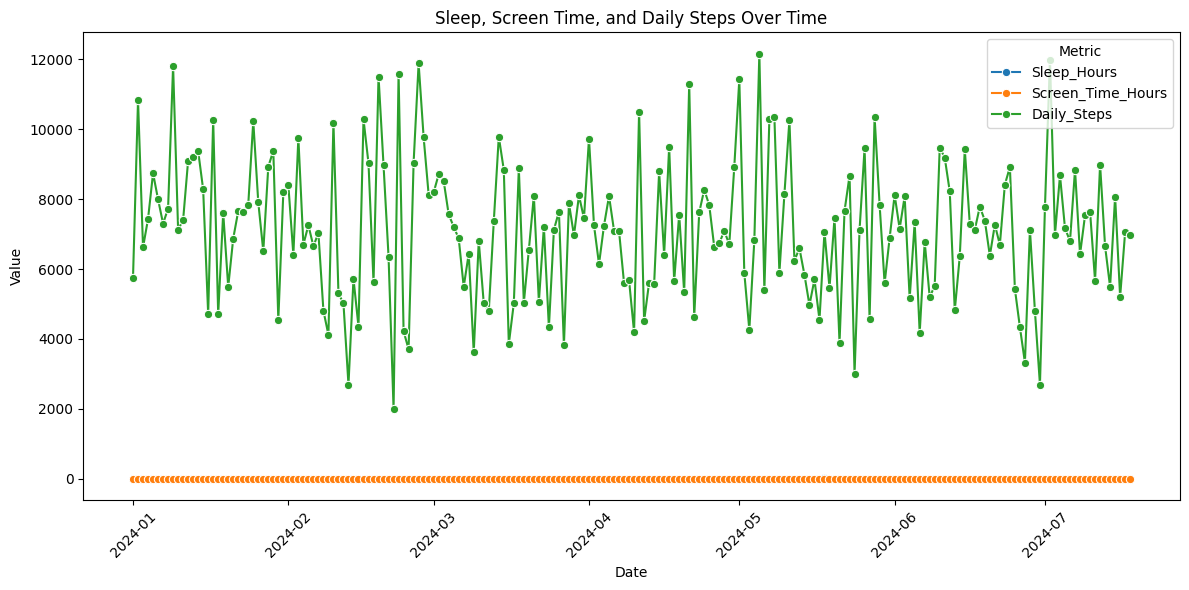

In [61]:
#Making sure Date column is datetime
df['Date'] = pd.to_datetime(df['Date'])
# Melting the dataframe for multiple lines (already done in your code)
df_melt = df.melt(
    id_vars='Date',
    value_vars=['Sleep_Hours', 'Screen_Time_Hours', 'Daily_Steps'],
    var_name='Metric',
    value_name='Value'
)
plt.figure(figsize=(12,6))
#Plotting lines with markers using Seaborn
sns.lineplot(
    data=df_melt,
    x='Date',
    y='Value',
    hue='Metric',
    marker='o',       # shows dots on data points
    palette='tab10'
)

plt.title("Sleep, Screen Time, and Daily Steps Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
#Save as PNG for GitHub
plt.savefig("Metrics_Over_Time.png")
plt.show()